궁금한 지역을 동단위로 입력하시오
가수원동


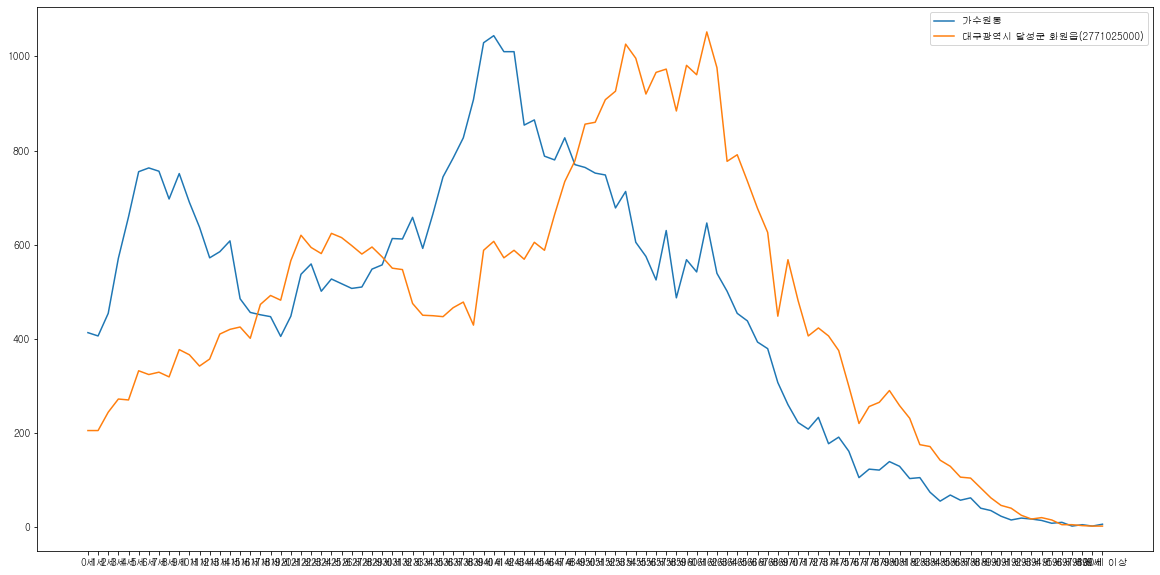

In [92]:
import csv
import matplotlib.pyplot as plt
f = open('인구현황.csv', 'r', encoding='cp949')
from matplotlib import font_manager, rc
font_path = r'C:/windows/Fonts/gulim.ttc'
font = font_manager.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)
data = csv.reader(f)
next(data)
header = next(data)

data = list(data)

title = [tit[11:] for tit in header[3:104]]

name = input('궁금한 지역을 동단위로 입력하시오\n')
home = []

 

for row in data:
    if name in row[0]:
        tot_per = int(row[1])
        for i in row[3:104]:
            home.append(int(i))


# plt.figure(figsize=(20,10))
# plt.plot(title, home)
# plt.show()

temp = 1000

for row in data:
    if abs(tot_per - int(row[1])) < temp:
        home2 = []
        home2_name = ''
        temp = tot_per - int(row[1])
        for i in row[3:104]:
            home2_name = row[0]
            home2.append(int(i))


plt.figure(figsize=(20,10))
plt.plot(title, home, label=name)
plt.plot(title, home2, label=home2_name)
plt.legend()
plt.show()

<ipython-input-101-cbc55ee808a1>:4: RuntimeWarning: invalid value encountered in true_divide
  age_pct = np.array(row[3:104],dtype=int) / int(row[2])


부산광역시  (2600000000) 3343504


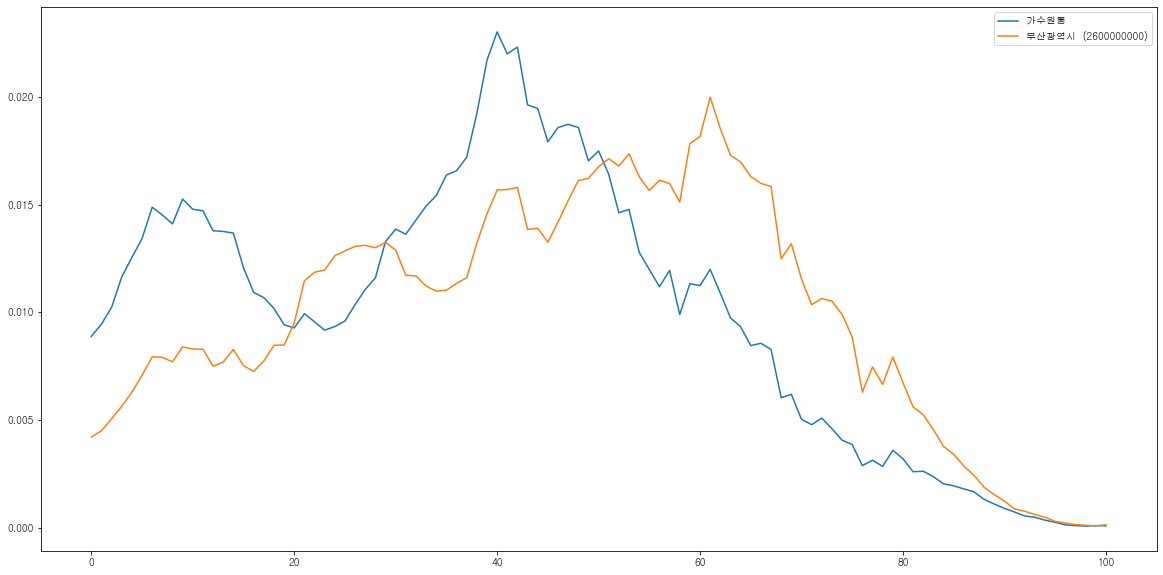

In [101]:
import numpy as np
age_pct = []
for row in data:
    age_pct = np.array(row[3:104],dtype=int) / int(row[2])

mx = 1
for row in data:
    if np.sum(home)*0.9 < int(row[1]):
        away = np.array(row[3:104],dtype=int) / int(row[2])
        s = np.sum(age_pct - away)
        if s < mx:
            mx = s
            result_name = row[0]
            result = away
            away_num = np.array(row[3:104],dtype=int)
print(result_name, np.sum(away_num))
plt.figure(figsize=(20,10))
plt.plot(age_pct ,label=name)
plt.plot(result, label=result_name)
plt.legend()

plt.show()

In [151]:
away = 0
city_name = ''
for row in data:
    if '대전광역시' in row[0]:
        if row[0].count('0',0, len(row[0])) < 6:
            if np.sum(np.array(row[3:9],dtype=int)) > away:
                away = np.sum(np.array(row[3:9],dtype=int))
                city_name = row[0]

print("영유가 가장 많이 사는 지역은 :", city_name, "이며" , away ,"명 입니다.")


영유가 가장 많이 사는 지역은 : 대전광역시 서구 가수원동(3017059000) 이며 3258 명 입니다.
